## Bike Sharing Demand_Forecast use of a city bikeshare system
출처 : https://www.kaggle.com/c/bike-sharing-demand/data

In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import missingno as msno

In [4]:
dailyData = pd.read_csv("./data/train.csv")

In [5]:
dailyData.shape

(10886, 12)

## Data Summary

In [6]:
dailyData.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [7]:
dailyData.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## Feature Enginnering

In [8]:
dailyData["date"] = dailyData.datetime.apply(lambda x : x.split()[0])
dailyData["hour"] = dailyData.datetime.apply(lambda x : x.split()[1].split(":")[0])
dailyData["weekday"] = dailyData.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])
dailyData["month"] = dailyData.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString, "%Y-%m-%d").month])
dailyData["season"] = dailyData.season.map({1:  "Spring", 2 : "Summer", 3 : "Fall", 4 : "Winter"})
dailyData["weather"] = dailyData.weather.map({1 : "Clear + Few clouds + Partly cloudy + Partly cloudy",
                                             2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
                                             3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
                                             4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"})

In [9]:
categoryVariableList = ["hour", "weekday", "month", "season", "weather", "holiday", "workingday"]
for var in categoryVariableList :
    dailyData[var] = dailyData[var].astype("category")

## 컬럼제거

In [10]:
dailyData = dailyData.drop(["datetime"],axis = 1)

## 변수 시각화

In [11]:
dailyData.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly cl...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly cl...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January


In [12]:
dateTypeDf.head(2)

NameError: name 'dateTypeDf' is not defined

In [ ]:
#오류! 
dateTypeDf = pd.DataFrame(dailyData.dtypes.value_counts()).reset_index().rename(columns  = {"index" : "variableType", 0 : "count"})
fig,ax = plt.subplots()
fig.set_size_inches(12,5)
sn.barplot(data = dateTypeDf,  x = "variableType", y = "count", ax = ax)
ax.set(xlabel ='variableTypeariable Type', ylabel = 'Count', title = 'Variables DataType Count')

## 결측값 분석

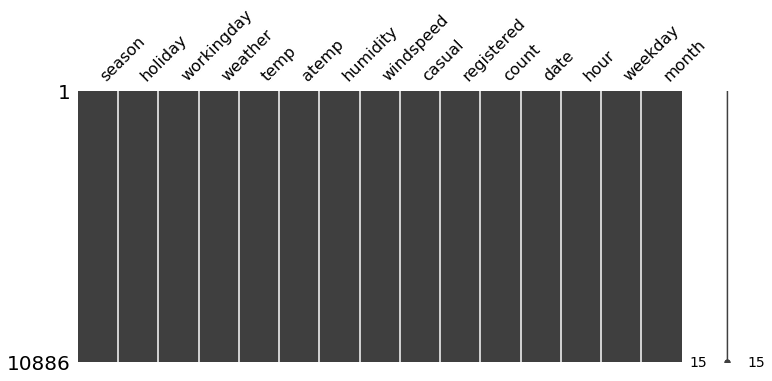

In [13]:
msno.matrix(dailyData,figsize=(12,5))


## Outliers Analysis

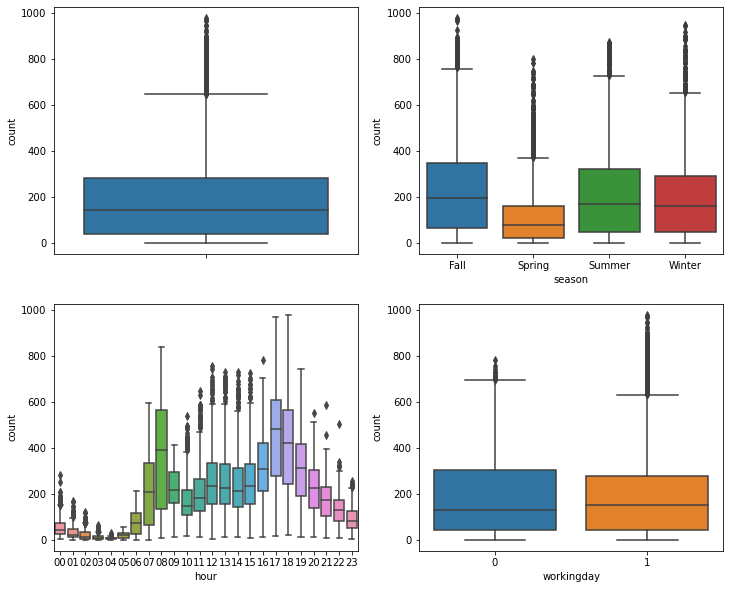

In [14]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(12, 10)
sn.boxplot(data = dailyData, y= "count", orient = "v", ax = axes[0][0])
sn.boxplot(data = dailyData, y= "count", x = "season", orient = "v", ax = axes[0][1])
sn.boxplot(data = dailyData, y = "count", x = "hour", orient  = "v", ax = axes[1][0])
sn.boxplot(data = dailyData, y= "count", x = "workingday", orient = "v", ax = axes[1][1])

## 이상값 제거

In [15]:
dailyDataWithoutOutliers = dailyData[np.abs(dailyData["count"] - dailyData["count"].mean())<=(3*dailyData["count"].std())]

In [16]:
print("Shape of The Before Ouliers : ", dailyData.shape)
print("Shape of The After Ouliers : ", dailyDataWithoutOutliers.shape)

Shape of The Before Ouliers :  (10886, 15)
Shape of The After Ouliers :  (10739, 15)


## 상관분석

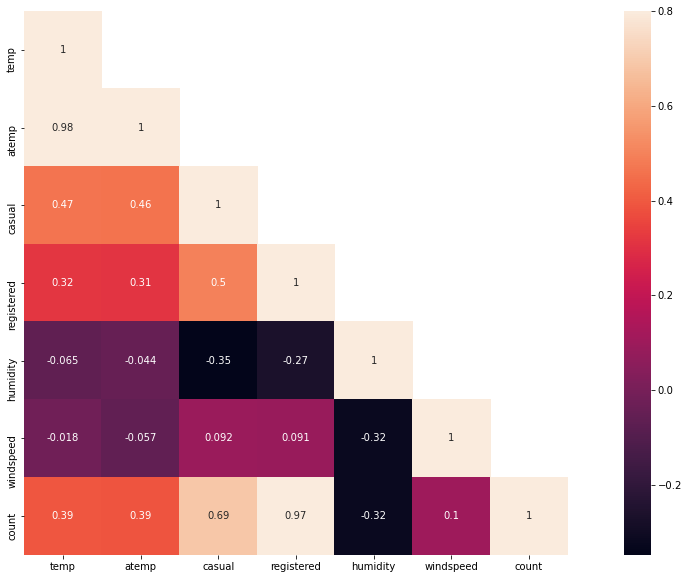

In [17]:
corrMatt = dailyData[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask = mask, vmax = .8, square = True, annot = True)

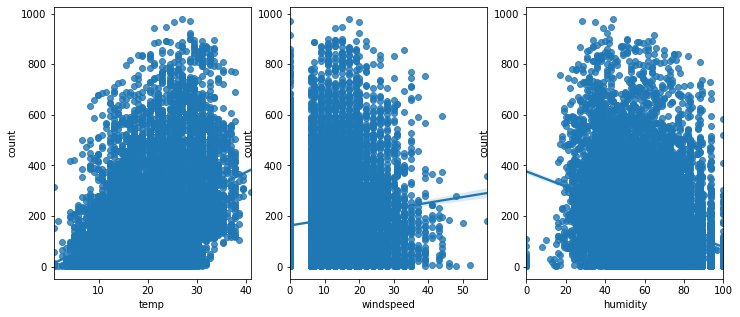

In [23]:
fig,(ax1, ax2, ax3) = plt.subplots(ncols = 3)
fig.set_size_inches(12,5)
sn.regplot(x =  "temp", y = "count", data = dailyData, ax = ax1)
sn.regplot(x =  "windspeed", y = "count", data = dailyData, ax = ax2)
sn.regplot(x =  "humidity", y = "count", data = dailyData, ax = ax3)


## 데이터분포 시각화

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909612))

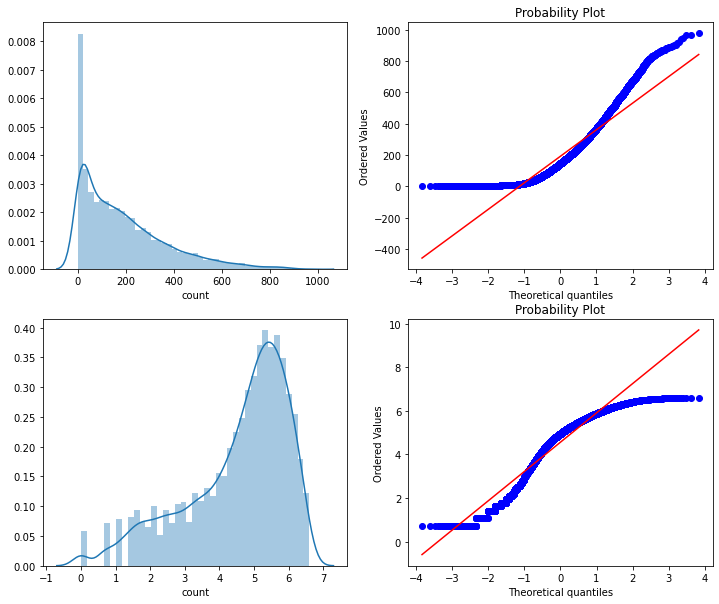

In [28]:
fig, axes = plt.subplots(ncols = 2, nrows = 2)
fig.set_size_inches(12, 10)
sn.distplot(dailyData["count"], ax = axes[0][0])
stats.probplot(dailyData["count"], dist = 'norm', fit = True, plot = axes[0][1])
sn.distplot(np.log(dailyDataWithoutOutliers["count"]), ax = axes[1][0])
stats.probplot(np.log1p(dailyDataWithoutOutliers["count"]), dist = 'norm',
              fit = True, plot = axes[1][1])

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Types'),
 None]

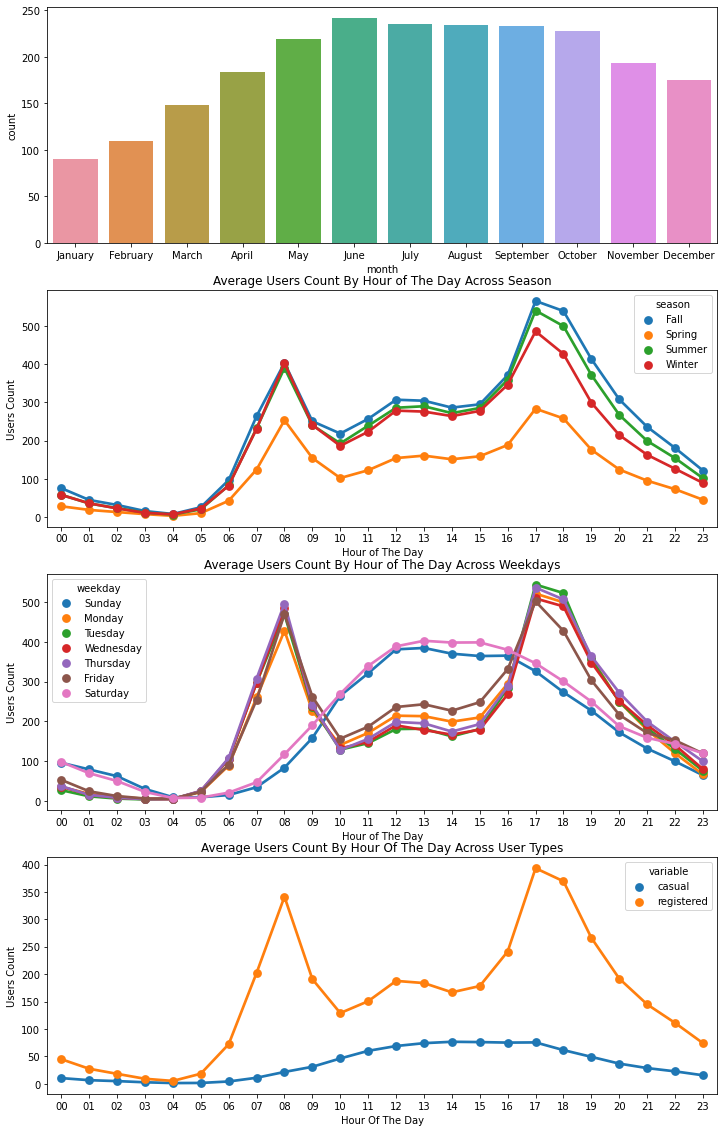

In [47]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4)
fig.set_size_inches(12, 20)
sortOrder = ["January","February","March","April","May","June","July","August",
             "September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(dailyData.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by = "count", ascending = False)

sn.barplot(data = monthSorted, x = "month", y = "count", ax = ax1, order = sortOrder)

hourAggregated = pd.DataFrame(dailyData.groupby(["hour", "season"], sort = True)["count"].mean()).reset_index()
sn.pointplot(x = hourAggregated["hour"], y = hourAggregated["count"],hue = hourAggregated["season"],data = hourAggregated, 
            join = True, ax = ax2)
ax2.set(xlabel = "Hour of The Day", ylabel = "Users Count", title = "Average Users Count By Hour of The Day Across Season",
       label = "big")

hourAggregated = pd.DataFrame(dailyData.groupby(["hour", "weekday"], sort = True)["count"].mean()).reset_index()
sn.pointplot(x = hourAggregated["hour"], y = hourAggregated["count"], hue = hourAggregated["weekday"],hue_order = hueOrder, data = hourAggregated,join = True, ax = ax3)
ax3.set(xlabel = "Hour of The Day", ylabel = "Users Count", title = "Average Users Count By Hour of The Day Across Weekdays", label = "big")

hourTransformed =  pd.melt(dailyData[["hour", "casual", "registered"]], id_vars= ["hour"],
                          value_vars = ["casual", "registered"])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour", "variable"],sort = True)["value"].mean()).reset_index()
sn.pointplot(x = hourAggregated["hour"], y = hourAggregated["value"],hue = hourAggregated["variable"], hue_order = ["casual","registered"],data = hourAggregated, join = True, ax = ax4)
ax4.set(xlabel= "Hour Of The Day", ylabel = "Users Count", title = "Average Users Count By Hour Of The Day Across User Types", label = "big")